# Welcome to Week 2
Last week you played with data and built models in a very practical way. This week, you will go deeper into theory and spend time on some foundational concepts.  This notebook is divided into two sections:

1. The Theory: an introduction to bias and variance - two key concepts in machine learning - and how they affect model performance
2. The Practice: a chance for you to experiment with how we deal with these concepts in practice

**You may finish the coding questions fairly quickly, but we expect you to spend most of your time teaching yourself the theoretical concepts** that come up in this notebook. We will use the 2-on-1 review session to test you on these concepts. Consequently, you should spend your time going through the below **resources** and playing with these concepts beyond this notebook.
### Resources (spend your time here!)
- [Caltech Learn from data](http://work.caltech.edu/telecourse.html ""): Seminal online course that introduces the theory of machine learning
- [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/ ""): Landmark textbook (and videos) on machine learning theory
- *Machine Learning* by Tom M. Mitchell: See chapters 5.2 & 5.3 (textbook available on our bookshelf)
- [Datacamp Supervised learning with scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn ""): Practical walkthrough of some key concepts and their application
- [Understanding the Bias Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html ""): Blog post on the topic of bias and variance
- [Kaggle Ensembling Guide](https://mlwave.com/kaggle-ensembling-guide/ ""): Ensembling guide
- [XGBoost tutorials](https://xgboost.readthedocs.io/en/latest/tutorials/model.html ""): XGBoost guide

### Collaboration Policy

Collaboration is the best way to learn. Try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we will check for direct copying of code.

Please list your collaborators:

1. Tupac Shakur
2. ???

### Imports
This section should be reserved for packages/libraries you that you would normally use (you can add models/functions/libraries as you go along)

In [609]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import utils
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset
Begin by loading the Boston House Prices dataset, or simply the Boston dataset, for our exploration. <br>
You can find it on Kaggle, or simply import it from the scikit-learn build-in datasets.

In [14]:
#Load dataset and turn it into a dataframe
boston = load_boston()
boston_price = boston.target
#print(boston_price.shape)

boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['Price'] = boston_price


In [15]:
print(boston_df.head())

print(boston_df.describe())

print(boston_df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.0000

# The Theoretical Side

In the first week, you learned about how to use some supervised learning algorithms. In this second week, we will go slightly deeper, to appreciate why machine learning works. We still stay in the realm of supervised learning, but many of the concepts learned here are applicable to general machine learning.

# 1. Model Complexity

We want to demonstrate the impact of implementing complicated models. <br> __Explore the dataset and choose one variable that you think can be most predictive of the target variable (price) in the Boston dataset.__ <br> (Please provide justification to the variable you chose in writing).

From the scatter plots, it was observed that the percentage of lower status (LSTAT) and the average number of rooms per dwelling seem to be good predictors. LSTAT was chosen as it has the best correlation with the actual house price.

In [282]:
corr = boston_df.corr()
print(corr['Price'])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64


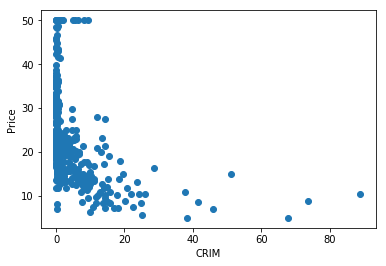

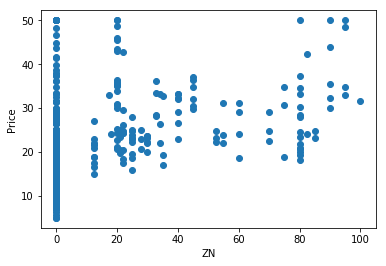

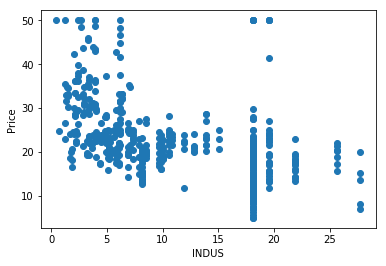

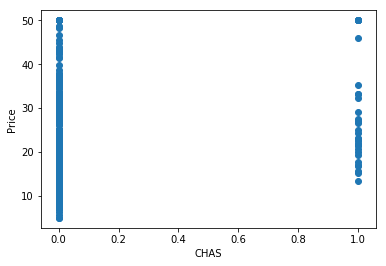

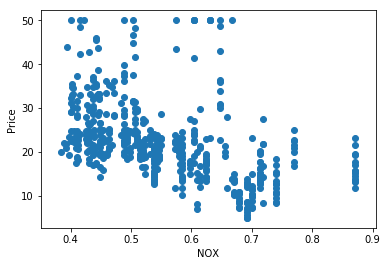

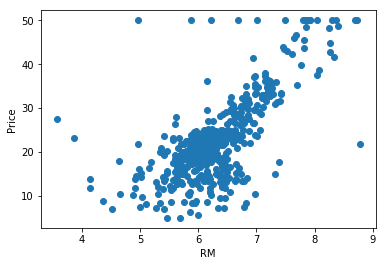

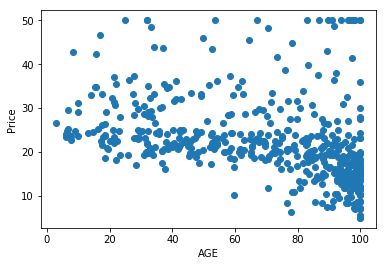

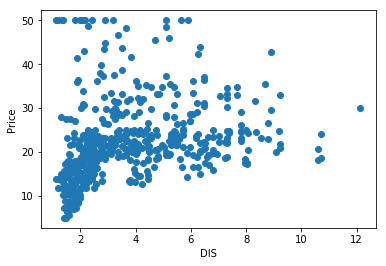

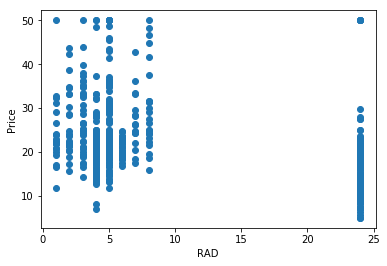

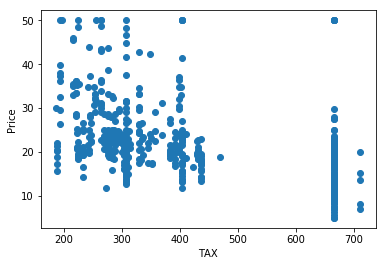

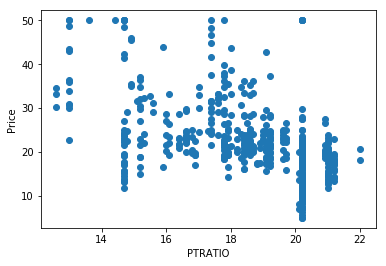

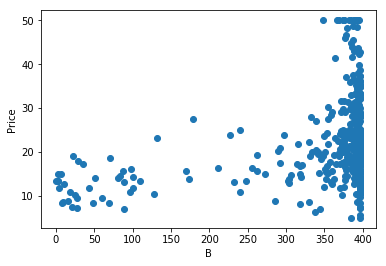

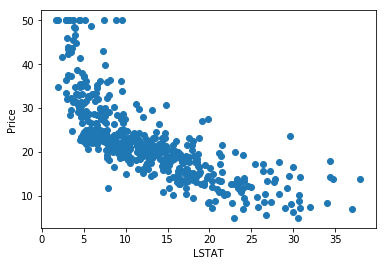

In [52]:
#Plot the scatter plot of the various features against the price of the house

Price = np.asarray(boston_df['Price'])

for ii in range(0,len(boston_df.columns)-1):
    plt.scatter(boston_df[boston_df.columns[ii]], Price)
    plt.xlabel(boston_df.columns[ii])
    plt.ylabel('Price')
    plt.show()

_(Provide your verbal answer here)_

__Create a linear regression model, and try to predict the price based on the parameter you chose:__

In [535]:
#Split into train and test sets
train_set, test_set = train_test_split(boston_df, test_size = 0.2)

x_train = np.array(train_set['LSTAT'])
y_train = np.array(train_set['Price'])

x_test = np.array(test_set['LSTAT'])
y_test = np.array(test_set['Price'])

#print(type(x_train))
    
regr = LinearRegression()
#print(x_train.reshape(-1,1))
regr = regr.fit(x_train.reshape(-1, 1),y_train)

predict_house = regr.predict(x_train.reshape(-1, 1))

#print(predict_house)

__Extract the coefficients or weights of the linear model interpret what they mean.__ <br> Make sure you visualise the linear regression line and comment on how the line fits the data.

In [536]:
print('R2:',regr.score(x_train.reshape(-1,1),y_train))
print('Coefficient:', regr.coef_[0])
print('Intercept:',regr.intercept_)

R2: 0.5343707985718852
Coefficient: -0.9394192093912462
Intercept: 34.504706677675046


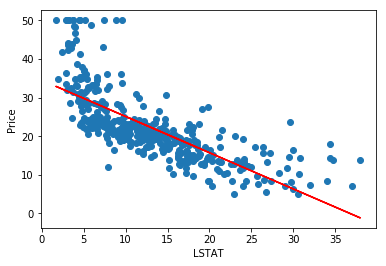

In [537]:
plt.scatter(x_train, y_train)
plt.plot(x_train,predict_house, 'r')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

_(Provide your verbal answer here)_

Linear regression is considered a simple model, using a polynomial model introduces a higher complexity. <br>
__Find and implement two more models (with medium and high complexity) to predict the target variable, using the same variable you chose for the previous part__ (Be sure to visualize your result and comment about the fit).

Fit and plot your medium complexity model here:

In [538]:
# Medium complexity: Have squared terms
poly = PolynomialFeatures(2)

x_trans = poly.fit_transform(x_train.reshape(-1,1))

x_new = x_trans[:,1:3]

print(x_new.shape)

regr_new = LinearRegression()

regr_new = regr_new.fit(x_new,y_train)

predict_house_new = regr_new.predict(x_new)

(404, 2)


In [539]:
print('R2:',regr_new.score(x_new,y_train))
print('Coefficient1:', regr_new.coef_[0])
print('Coefficient2:', regr_new.coef_[1])
print('Intercept:',regr_new.intercept_)

R2: 0.6320124630499715
Coefficient1: -2.3065227145931644
Coefficient2: 0.04255355957272251
Intercept: 42.83982848970431


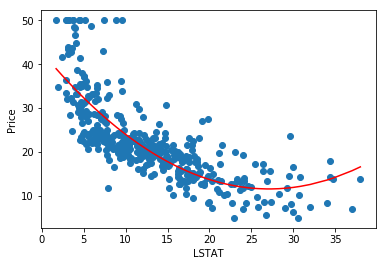

In [540]:
plt.scatter(x_train, y_train)
data_cat = np.column_stack((x_train,predict_house_new))
data_sort = data_cat[data_cat[:,0].argsort()]
plt.plot(data_sort[:,0],data_sort[:,1], 'r')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

Fit and plot your high complexity model here:

In [541]:
KNR = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)
KNR = KNR.fit(x_train.reshape(-1,1),y_train)
predict_house_KNR = KNR.predict(x_train.reshape(-1,1))

In [542]:
print('R2:',KNR.score(x_train.reshape(-1,1),y_train))

R2: 0.9816760269522923


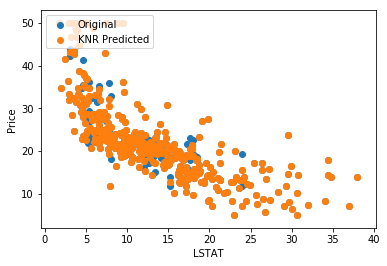

In [543]:
plt.scatter(x_train, y_train,label = 'Original')
plt.scatter(x_train,predict_house_KNR,label = 'KNR Predicted')
#data_cat2 = np.column_stack((x_train,predict_house_KNR))
#data_sort2 = data_cat2[data_cat2[:,0].argsort()]
#plt.plot(data_cat2[:,0],data_cat2[:,1], 'r')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

Use the following section to answer: which of the models has the best fit and why?

The most complex model has the best fit. This is because there will be more terms to account for outliers or residuals.

__Find a quantitative way of measuring the model fit__ <br>
Calculate it for each one of the models and compare the results to your visual inspection interpretation:

The R-Squared or regression coefficient value can be used to measure the model fit. From the coefficient values, it can be observed that the fit improves from the linear model to the polynomial model and to the K-nearest regressor model.

In [544]:
print('R2-Linear:',regr.score(x_train.reshape(-1,1),y_train))
print('R2-Polynomial:',regr_new.score(x_new,y_train))
print('R2-KNR:',KNR.score(x_train.reshape(-1,1),y_train))

R2-Linear: 0.5343707985718852
R2-Polynomial: 0.6320124630499715
R2-KNR: 0.9816760269522923


If you did the exercise right, you should see the viaual and quantative fit increase in the same direction as the model complexity. 


##### But is fitness a good measure of a model?
In order to put this question to the test, __perform a cross-validation test for the three models and compare between them:__

In [548]:
#Obtain the different folds
fold = KFold(10,True)

lin_cv_R2 = []
poly_cv_R2 = []
KNR_cv_R2 = []

lin_cv_RMSE = []
poly_cv_RMSE = []
KNR_cv_RMSE = []

#Get the different scores
for train,test in fold.split(boston_df):
    #print('Train:', train)
    #print('Test:', test)
    
    #Linear Model
    regr_cv = LinearRegression()
    regr_cv = regr_cv.fit(np.array(boston_df['LSTAT'][train]).reshape(-1, 1),np.array(boston_df['Price'][train]))
    lin_cv_R2.append(regr_cv.score(np.array(boston_df['LSTAT'][test]).reshape(-1,1),np.array(boston_df['Price'][test])))
    lin_cv_RMSE.append(sqrt(mean_squared_error(regr_cv.predict(np.array(boston_df['LSTAT'][test]).reshape(-1,1)),np.array(boston_df['Price'][test]))))
    
    #Poly model
    x_train_trans = poly.fit_transform(np.array(boston_df['LSTAT'][train]).reshape(-1, 1))
    x_test_trans = poly.fit_transform(np.array(boston_df['LSTAT'][test]).reshape(-1, 1))
    x_train2 = x_train_trans[:,1:3]
    x_test2 = x_test_trans[:,1:3]
    regr_poly_cv = LinearRegression()
    regr_poly_cv = regr_poly_cv.fit(x_train2,np.array(boston_df['Price'][train]))
    poly_cv_R2.append(regr_poly_cv.score(x_test2,np.array(boston_df['Price'][test])))
    poly_cv_RMSE.append(sqrt(mean_squared_error(regr_poly_cv.predict(x_test2),np.array(boston_df['Price'][test]))))
    
    #KNR model
    KNR_cv = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)
    KNR_cv = KNR_cv.fit(np.array(boston_df['LSTAT'][train]).reshape(-1, 1),np.array(boston_df['Price'][train]))
    KNR_cv_R2.append(KNR_cv.score(np.array(boston_df['LSTAT'][test]).reshape(-1,1),np.array(boston_df['Price'][test])))
    KNR_cv_RMSE.append(sqrt(mean_squared_error(KNR_cv.predict(np.array(boston_df['LSTAT'][test]).reshape(-1,1)),np.array(boston_df['Price'][test]))))

lin_R2_mean = np.array(lin_cv_R2).mean()
poly_R2_mean = np.array(poly_cv_R2).mean()
KNR_R2_mean = np.array(KNR_cv_R2).mean()

lin_RMSE_mean = np.array(lin_cv_RMSE).mean()
poly_RMSE_mean = np.array(poly_cv_RMSE).mean()
KNR_RMSE_mean = np.array(KNR_cv_RMSE).mean()

print('Linear_R2:',lin_R2_mean)
print('Poly_R2:',poly_R2_mean)
print('KNR_R2:',KNR_R2_mean)

print('Linear_RMSE:',lin_RMSE_mean)
print('Poly_RMSE:',poly_RMSE_mean)
print('KNR_RMSE:',KNR_RMSE_mean)

Linear_R2: 0.5299590409781866
Poly_R2: 0.6236910623581291
KNR_R2: 0.5093306488892001
Linear_RMSE: 6.185070611641017
Poly_RMSE: 5.515958805130019
KNR_RMSE: 6.297197198438075


In [547]:
regr_cv = LinearRegression()
KNR_cv = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)

boston_df_y = boston_df['Price']
boston_df_x = np.array(boston_df['LSTAT']).reshape(-1,1)

boston_df_y,boston_df_x = utils.shuffle(boston_df_y,boston_df_x)

boston_df_poly = poly.fit_transform(boston_df_x)
boston_df_poly2 = boston_df_poly[:,1:]
#print(boston_df_poly.shape)
#print(boston_df_poly2.shape)

linear_RM_R2 = cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=10,scoring='r2')
poly_RM_R2 = cross_val_score(regr_cv,boston_df_poly,boston_df_y,cv=10,scoring='r2')
KNR_RM_R2 = cross_val_score(KNR_cv,boston_df_x,boston_df_y,cv=10,scoring='r2')

linear_RM_MSE = abs(cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=10,scoring='neg_mean_squared_error'))
poly_RM_MSE = abs(cross_val_score(regr_cv,boston_df_poly,boston_df_y,cv=10,scoring='neg_mean_squared_error'))
KNR_RM_MSE = abs(cross_val_score(KNR_cv,boston_df_x,boston_df_y,cv=10,scoring='neg_mean_squared_error'))

print(linear_RM_R2)
print('Linear_RM_R2:',linear_RM_R2.mean())
print('Poly_RM_R2:',poly_RM_R2.mean())
print('KNR_RM_R2:',KNR_RM_R2.mean())

print('Linear_RM_MSE:',linear_RM_MSE.mean())
print('Poly_RM_MSE:',poly_RM_MSE.mean())
print('KNR_RM_MSE:',KNR_RM_MSE.mean())

[0.47999774 0.63167    0.42488551 0.56492442 0.46402409 0.63827283
 0.47023734 0.61462409 0.57884618 0.37574228]
Linear_RM_R2: 0.5243224497682537
Poly_RM_R2: 0.6202481722826814
KNR_RM_R2: 0.5007720598608522
Linear_RM_MSE: 38.88279936269689
Poly_RM_MSE: 30.751090716880917
KNR_RM_MSE: 38.61131203841345


What measure did you use to compare between the models and why? <br>
Which one fits the data the best? Explain that result

Both R-squared and the mean squared error (MSE) were used. These measures will reflect the fit and also the errors within the model.

The polynomial function fits the data the best. This is because it's complexity is between that of the linear and the K-nearest neighbour regression. It will be closer to the optimal point between underfitting and overfitting.

Let's try to extend this discussion by including all the remaining variables in the Boston dataset. <br> __Fit the three models, use _all_ the variables in the Boston dataset and compare their cross validation scores.__ <br> See if you observe the same patterns as when using one variable.

In [549]:
for train,test in fold.split(boston_df):
    #print('Train:', train)
    #print('Test:', test)
    
    #Linear Model
    regr_cv = LinearRegression()
    regr_cv = regr_cv.fit(boston_df.iloc[train,0:-1],boston_df.iloc[train,-1])
    lin_cv_R2.append(regr_cv.score(boston_df.iloc[test,0:-1],boston_df.iloc[test,-1]))
    lin_cv_RMSE.append(sqrt(mean_squared_error(regr_cv.predict(boston_df.iloc[test,0:-1]),boston_df.iloc[test,-1])))
    
    #Poly model
    x_train_trans = poly.fit_transform(boston_df.iloc[train,0:-1])
    x_test_trans = poly.fit_transform(boston_df.iloc[test,0:-1])
    x_train2 = x_train_trans[:,1:]
    x_test2 = x_test_trans[:,1:]
    regr_poly_cv = LinearRegression()
    regr_poly_cv = regr_poly_cv.fit(x_train2,boston_df.iloc[train,-1])
    poly_cv_R2.append(regr_poly_cv.score(x_test2,boston_df.iloc[test,-1]))
    poly_cv_RMSE.append(sqrt(mean_squared_error(regr_poly_cv.predict(x_test2),boston_df.iloc[test,-1])))
    
    #KNR model
    KNR_cv = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)
    KNR_cv = KNR_cv.fit(boston_df.iloc[train,0:-1],boston_df.iloc[train,-1])
    KNR_cv_R2.append(KNR_cv.score(boston_df.iloc[test,0:-1],boston_df.iloc[test,-1]))
    KNR_cv_RMSE.append(sqrt(mean_squared_error(KNR_cv.predict(boston_df.iloc[test,0:-1]),boston_df.iloc[test,-1])))

lin_R2_mean = np.array(lin_cv_R2).mean()
poly_R2_mean = np.array(poly_cv_R2).mean()
KNR_R2_mean = np.array(KNR_cv_R2).mean()

lin_RMSE_mean = np.array(lin_cv_RMSE).mean()
poly_RMSE_mean = np.array(poly_cv_RMSE).mean()
KNR_RMSE_mean = np.array(KNR_cv_RMSE).mean()

print('Linear_R2:',lin_R2_mean)
print('Poly_R2:',poly_R2_mean)
print('KNR_R2:',KNR_R2_mean)

print('Linear_RMSE:',lin_RMSE_mean)
print('Poly_RMSE:',poly_RMSE_mean)
print('KNR_RMSE:',KNR_RMSE_mean)

Linear_R2: 0.6175122451331507
Poly_R2: 0.7278927269854358
KNR_R2: 0.5415116078280582
Linear_RMSE: 5.522687051135515
Poly_RMSE: 4.575045592138065
KNR_RMSE: 6.068598792568764


In [585]:
regr_cv = LinearRegression()
KNR_cv = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)
boston_df_y = boston_df['Price']
boston_df_x = boston_df.iloc[:,0:-1]

#print(boston_df_x.head())
#print(boston_df_y.head())

boston_df_y,boston_df_x = utils.shuffle(boston_df_y,boston_df_x)

boston_df_poly = poly.fit_transform(boston_df_x)
boston_df_poly2 = boston_df_poly.copy() #boston_df_poly[:,1:]
#print(boston_df_poly.shape)
#print(boston_df_poly2.shape)
linear_All_R2 = cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=5,scoring='r2')
poly_All_R2 = cross_val_score(regr_cv,boston_df_poly,boston_df_y,cv=5,scoring='r2')
KNR_All_R2 = cross_val_score(KNR_cv,boston_df_x,boston_df_y,cv=5,scoring='r2')

linear_All_MSE = abs(cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=5,scoring='neg_mean_squared_error'))
poly_All_MSE = abs(cross_val_score(regr_cv,boston_df_poly,boston_df_y,cv=5,scoring='neg_mean_squared_error'))
KNR_All_MSE = abs(cross_val_score(KNR_cv,boston_df_x,boston_df_y,cv=5,scoring='neg_mean_squared_error'))

print('Linear_All_R2:',linear_All_R2.mean())
print('Poly_All_R2:',poly_All_R2.mean())
print('KNR_All_R2:',KNR_All_R2.mean())

print('Linear_All_MSE:',linear_All_MSE.mean())
print('Poly_All_MSE:',poly_All_MSE.mean())
print('KNR_All_MSE:',KNR_All_MSE.mean())

Linear_All_R2: 0.7186917276971132
Poly_All_R2: 0.7679661384981605
KNR_All_R2: 0.53709299493615
Linear_All_MSE: 23.756674035423565
Poly_All_MSE: 18.923066322241738
KNR_All_MSE: 38.19237288305869


In [603]:
regr_cv = LinearRegression()
boston_df_y = boston_df['Price']
boston_df_x = boston_df.iloc[:,0:-1]

boston_df_y,boston_df_x = utils.shuffle(boston_df_y,boston_df_x)

linear_All_R2 = cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=10,scoring='r2')
print('Linear_All_R2:',linear_All_R2.mean())

poly = PolynomialFeatures(2)
boston_df_poly = poly.fit_transform(boston_df_x)
poly_All_R2 = cross_val_score(regr_cv,boston_df_poly,boston_df_y,cv=10,scoring='r2')
print('Poly_All_R2:',poly_All_R2.mean())

poly3 = PolynomialFeatures(3)
boston_df_poly3 = poly3.fit_transform(boston_df_x)
poly3_All_R2 = cross_val_score(regr_cv,boston_df_poly3,boston_df_y,cv=10,scoring='r2')
print('Poly3_All_R2:',poly3_All_R2.mean())


Linear_All_R2: 0.6987663810813143
Poly_All_R2: 0.8293796344512284
Poly3_All_R2: -683773.2769220107


- For each model, explain the differences you encountered when expanding the dataset.<br>
- Compare the current result between models and try to explain it.

When the dataset was expanded, the R-squared values increased and the MSE values decreased. It indicates that the fit improved when variables were added and overall error also decreased. When more variables were added, it will reduce the bias.

When comparing between models, it seems that the Poly (power 2) model still performs the best. It is likely that the power of 2 is still closer to the optimal spot between underfitting and overfitting.

Share your thoughts/conclusions regarding complexity in modeling:

_(Provide your answer here)_

__Expending our discussion on model complexity, comment below how one can decrease/increase complexity in the following families of algorithms:__ 
- Decision tree 
- Artificial neural network 
- Support vector machine
- K-nearest neighbour
- Bayesian method (optional)

Decision tree: Increase the tree depth
Artificial neural network: Increase the number of hidden layers
Support vector machine: Depends on the choice of kernels
K-nearest neighbour: Decrease the value of K (number of neighbours)

__Provide the best explanation/definition (using your own words) of over/under-fitting:__

Overfitting means that the noise/outliers are fitted too well and cannot the model is not general enough.

# 2. Bias Variance Trade-Off

One might claim machine learning is about balancing. If that's the case, what measure can we use to find the right balance? 

From a more theoretical perspective, two useful measures are bias and variance.<br>
In an intuitive sense, __bias__ is how off-the-mark our prediction/estimate tends to be with respect to the true value we are trying to predict. Usually we get bias because of inherent limitation in the model/algorithm we choose, for example linear regression is limited only to fit linear patterns, and hence "biased" towards linearity. <br>
__Variance__ is how flexible the predictions made by the model can be to fit more complicated patterns in data. Highly complex models tend to have high variance. This comes as a cost; as flexibility increases, the sensitivity of the models to the training data that they try to fit increases, resulting in the predictions being more distributed away from the true values. 

__This is just the tip of the iceberg, we encourage you to pause your work on the notebook for now and seek more information about the relationship to get a better understanding before we dive in.__

Bias and variance is a trade-off, increasing one decreases the other.<br> __Provide an explanation to why this is so:__


When variance is low, the bias is high because the output will consistently be of similar distance away from the actual value. However, when variance is high, the bias will be low as the output can vary and the distance between the actual value can be reduced.

__Provide mathematical formulas for the bias, the variance and the overall prediction error of a model:__

In [ ]:
bias = E[g(x)] - y
variance = E[(g(x) - E[g(x))^2]]

Shifting our focus to a more practical approach, we will now try and demonstrate how to find the right balance between bias variance when fitting a model. 

__Define a high order polynomial curve to fit:__ <br>
(One example is: $f(x)=0.2x^{5}-3.5x^{4}+21x^{3}-53x^{2}+37x+0.6$ (you are free to define another function)

In [299]:
def f(x):
    f = (0.2*x**5) - (3.5*x**4) + (21*x**3) - (53*x**2) + (37*x) + 0.6
    return f    

Plot the function you created:

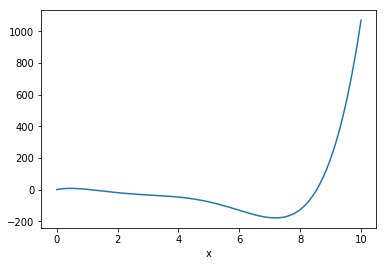

In [322]:
x_values = np.linspace(0,10,1000)
y_values = f(x_values)
    
plt.plot(x_values,y_values)
plt.xlabel('x')
plt.show()
    

Our goal is to estimate this function using polynomial regression. In real-life cases, the true function is not accessible to us, only noisy estimates around it.

__Now, simulate a training data by introducing random errors on the curve.__<br>The training data should look like the figure below (make sure you have at least a 1000 observations).

<img src="./training_data.png">

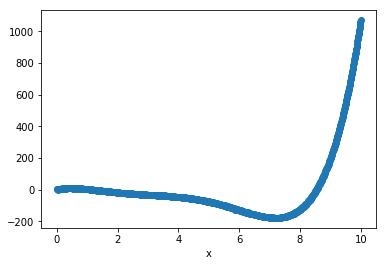

In [325]:
random = np.random.normal(loc=0.0, scale=1.0, size=len(y_values))
y_new = y_values + random

plt.scatter(x_values,y_new)
plt.xlabel('x')
plt.show()

Spare a few hundreds samples to use as the validation set (and plot it):

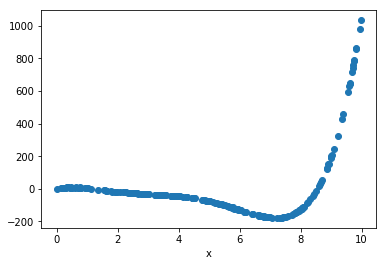

In [334]:
data = np.concatenate((x_values.reshape(-1,1),y_new.reshape(-1,1)),axis = 1)
data_train, data_test = train_test_split(data, test_size = 0.2)

plt.scatter(data_test[:,0],data_test[:,1])
plt.xlabel('x')
plt.show()

Using the remaining data, build 500 linear regression models, each by randomly sampling 80 observations from the pool:

In [335]:
print(len(data_train))

800


In [458]:
regr_500 = []
for ii in range(0,500,1):
    regr = LinearRegression()
    rows = np.random.randint(len(data_train),size=80)
    data_train_80 = data_train[rows,:]
    regr_500.append(regr.fit(data_train_80[:,0].reshape(-1,1),data_train_80[:,1]))    

__Calculate the bias square and variance of linear regression by predicting (using the 500 models) the values of the validation set above, and comparing them against the true values from the polynomial curve defined earlier.__ <br> (refer to the bias variance formula to do the calculation)

In [459]:
y_500 = []
for ii in range(0,500,1):
    y_500.append(regr_500[ii].predict(data_test[:,0].reshape(-1,1))) 
y_500T = np.transpose(np.array(y_500))

print(y_500T.shape)

(200, 500)


In [ ]:
bias = E[g(x)] - y
variance = E[(g(x) - E[g(x))^2]]

In [461]:
bias_200 = []
variance_200 = []
for ii in range(0,len(data_test[:,0])):
    bias_200.append((np.mean(y_500T[ii,:]) - f(data_test[ii,0]))**2)
    variance_200.append(np.mean((y_500T[ii,:] - np.mean(y_500T[ii,:])**2)))

print('Mean Squared Bias:',np.mean(bias_200))
print('Mean Variance:', np.mean(variance_200))

Mean Squared Bias: 45257.00142717641
Mean Variance: -5340.851006012846


Repeat the whole procedure of calculating bias variance, but this time using polynomial of degrees 2, 3, 4, ..., 15

In [466]:
def linear_reg_mul(x):
    regr = LinearRegression()
    rows = np.random.randint(len(x),size=80)
    data_train_80 = x[rows,:]
    regr = regr.fit(data_train_80[:,0:-1],data_train_80[:,-1])
    return regr

def get_sqbias(predict,actual):
    sqbias = np.mean((np.mean(predict) - actual)**2)
    return sqbias

def get_variance(predict):
    variance = np.mean((predict - np.mean(predict))**2)
    return variance

In [521]:
sq_bias_mean = []
variance_mean = []
MSE_mean = []
power = []
for ii in range(1,16,1):
    power.append(ii)
    poly = PolynomialFeatures(ii)
    x_train_trans = poly.fit_transform(data_train[:,0].reshape(-1,1))
    x_test_trans = poly.fit_transform(data_test[:,0].reshape(-1,1))
    sq_bias_poly500 = []
    variance_poly500 = []
    y_poly500 = []
    MSE = []
    for jj in range(0,500,1):
        regr_poly = linear_reg_mul(np.concatenate((x_train_trans,data_train[:,1].reshape(-1,1)),axis = 1))
        y_poly500.append(regr_poly.predict(x_test_trans))
    y_poly500T = np.transpose(y_poly500)
    for kk in range(0,len(data_test[:,1]),1):
        sq_bias_poly500.append(get_sqbias(y_poly500T[kk,:],f(data_test[kk,0])))
        variance_poly500.append(get_variance(y_poly500T[kk,:]))
        test_y = np.full((500,1),f(data_test[kk,0]))
        MSE.append(mean_squared_error(np.array(y_poly500T)[kk,:],test_y))
    sq_bias_mean.append(np.mean(sq_bias_poly500))
    variance_mean.append(np.mean(variance_poly500))
    MSE_mean.append(np.mean(MSE))
print('sq_bias_mean:',sq_bias_mean)
print('variance_mean:',variance_mean)
print('MSE:',MSE_mean)

sq_bias_mean: [45259.12342990652, 23284.914821730945, 6107.380039028237, 563.1715759418664, 0.004748948697794207, 0.004450114122514708, 0.005836017268988342, 0.007068564525342835, 0.006710920707569507, 0.012897269101470744, 0.015408992363499413, 0.01794204810099656, 0.030510416342335117, 0.038162610530918656, 0.396982511222719]
variance_mean: [1487.8118789403782, 1249.4841046469758, 613.1277830765325, 108.4852794432961, 0.09250696857277173, 0.11655989340749077, 0.16250037344209303, 0.2915787490364924, 0.2599269009035283, 1.3746104481786636, 1.429140198738827, 5.957109128658825, 3.7611493879413986, 3.326335656609966, 4.081899035771328]
MSE: [46746.9353088469, 24534.398926377922, 6720.507822104771, 671.6568553851627, 0.0972559172705658, 0.12101000753000553, 0.1683363907110818, 0.29864731356183505, 0.266637821611098, 1.3875077172801347, 1.4445491911023265, 5.975051176759823, 3.7916598042837357, 3.3644982671408865, 4.47888154699404]


Plot the bias and variance (as y) vs. the model complexity/polynomial degree (as x)

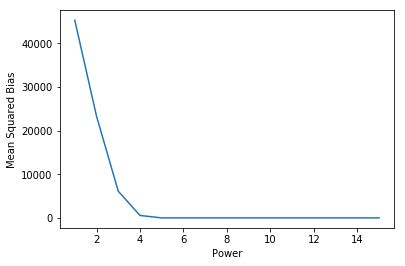

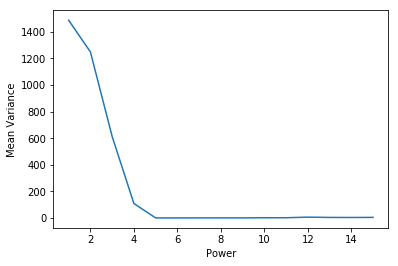

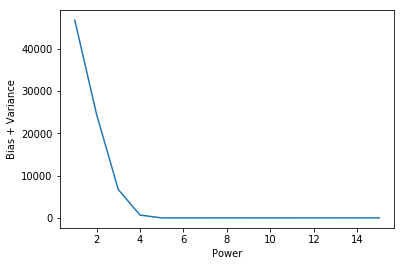

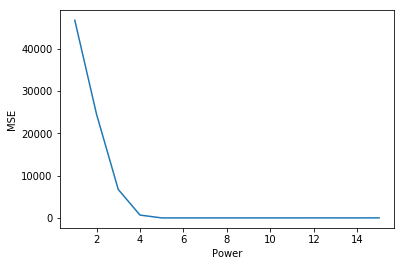

Bias + Variance: [4.67469353e+04 2.45343989e+04 6.72050782e+03 6.71656855e+02
 9.72559173e-02 1.21010008e-01 1.68336391e-01 2.98647314e-01
 2.66637822e-01 1.38750772e+00 1.44454919e+00 5.97505118e+00
 3.79165980e+00 3.36449827e+00 4.47888155e+00]


In [522]:
plt.plot(power,sq_bias_mean)
plt.xlabel('Power')
plt.ylabel('Mean Squared Bias')
plt.show()

plt.plot(power,variance_mean)
plt.xlabel('Power')
plt.ylabel('Mean Variance')
plt.show()

Total = np.array(sq_bias_mean) + np.array(variance_mean)
plt.plot(power,Total)
plt.xlabel('Power')
plt.ylabel('Bias + Variance')
plt.show()

plt.plot(power,MSE_mean)
plt.xlabel('Power')
plt.ylabel('MSE')
plt.show()

print('Bias + Variance:',Total)

Where is the optimal balance point? Which polynomial degree is that? <br>
Find out more and elaborate on the meaning and importance that point of balance.

The optimal balance point is at polynomial degree of 5.

This means that the error will be minimised when the fitting function has a polynomial degree of 5.

# The Practical Side 

Bias-variance trade-off is one of the most critical components of model tuning. You will need to find the right point in terms of model complexity to derive the best results for your model.

In practice, however, it is impossible to calculate bias and variance for an actual dataset. Try to explain why this is impossible below:

This is because in practice, the actual function is not known and therefore it is hard to deconstruct it into bias and variance.

Repeat the procedure you used to calculate bias-variance above, but this time calculate mean squared error instead. <br> Overlay the MSE on the bias variance plot earlier and comment on the observation.

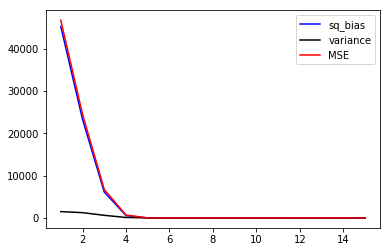

In [523]:
plt.plot(power,sq_bias_mean,'b',label='sq_bias')
plt.plot(power,variance_mean,'k',label='variance')
plt.plot(power,MSE_mean,'r',label='MSE')
plt.legend()
plt.show()


_(Provide your answer here)_

# 3. Out-of-sample Validation

Hence, we will go back to using mean squared errors (MSE) to tune our models. In reality, validation error is the most reliable source of information you can get, provided you do validation properly. You might have realised that MSE scores are negative when you put them through the `cross_val_score` method - do think about why this is so as well.

If you would like to do any data exploration, you can do them here.

In [ ]:
The MSE scores are negative to allow implementation of the GridSearch function as it tries to maximise the scores.

We will begin by building simple baseline models for our dataset. We will start with 3 baseline models: linear regression, k-nearest neighbours and decision trees. Build a simple regression model for each of them. Evaluate and report their performance, and identify the best model by preliminary performance.

## 3.1 Linear Regression

In [ ]:
boston_df_y = boston_df['Price']
boston_df_x = boston_df.iloc[:,0:-1]

boston_df_y,boston_df_x = utils.shuffle(boston_df_y,boston_df_x)

In [606]:
regr = LinearRegression()

linear_MSE = abs(cross_val_score(regr_cv,boston_df_x,boston_df_y,cv=10,scoring='neg_mean_squared_error'))

print('Linear MSE:',linear_MSE.mean())

Linear MSE: 23.677257315696345


## 3.2 K-Nearest Neighbours

In [608]:
KNN = KNeighborsRegressor(n_neighbors=5,weights='distance', p=2)

KNN_MSE = abs(cross_val_score(KNN,boston_df_x,boston_df_y,cv=10,scoring='neg_mean_squared_error'))

print('KNN MSE:',KNN_MSE.mean())

KNN MSE: 37.53529166728532


## 3.3 Decision Tree

In [610]:
DT = DecisionTreeRegressor()

DT_MSE = abs(cross_val_score(DT,boston_df_x,boston_df_y,cv=10,scoring='neg_mean_squared_error'))

print('DT MSE:',DT_MSE.mean())

DT MSE: 20.25345568627451


## Theoretical Considerations

How do we ensure that our models are reliably evaluated? Specifically, in the area of out-of-sample validation, how do we decide to use `train_test_split` vs `cross_val_score`?

It will depend on the number of data points. If there is a large dataset which has a high ratio of data points to features, a train_test_split would suffice as there will be sufficient data points to train and test the model. However, cross_val_score should be used if there are a few data points so as to allow the model to be able to learn most of the relationships between the features.

Given that the dataset has only ~500 rows of data, what are the challenges we face, and how can we best mitigate these issues?

# 4. Hyperparameter exploration

We will now start to look at hyperparameters for these models. Considering between the 3 models, k-nearest neighbours probably has the least hyperparameters to tune, and is also the simplest computationally. Hence, let's start with k-nearest neighbours. You might not want to try all of these parameters, considering limited time. This is a good time to do some research with respect to what parameters to optimise.

When conducting a parameter search, the idea of grid search immediately comes to mind. Why do we usually use grid search, and in what situations should we use other search options?

Grid search is used to find the optimal combination of parameters. However, as the value spacing is provided by the user, it may not be able to obtain the most optimal point. Additionally, it may be computationally expensive to run a fully exhaustive search. As such, if the number range of the parameters is large, it may be beneficial to first conduct a random search to isolate the likely number range before running a grid search.

Why do we not use gradient descent to identify the right parameters?

This is because the scoring function may have many local minima points which hinders the usage of gradient descent.

## 4.1 KNN

In [162]:
neighbors.KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Apart from the `n_neighbors` and `n_jobs` parameters, pick out 1-2 more which you are unfamiliar with and do some research. Explain what they do with language intended for a lay person. You may also wish to spend some time thinking about how you might want to implement such a model algorithmically.

## 4.2 Decision Trees

Now we can proceed to a more complicated model, try to tune the hyperparameter of a decision tree regressor.

In [163]:
tree.DecisionTreeRegressor().get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

The linear model also requires tuning, but the current API we are using (linear_model.LinearRegression) is relatively weak and lacks the parameters we are looking for. Instead, we will work with elastic nets, and go beyond linear model complexity to build a better linear regression model. We will look at this in detail in the next session.

# 5. Feature Selection

We will begin by taking the model beyond linearity. In statistical languages more tuned towards modelling like R, we introduce polynomial features/covariates through a parameter within the model, as such:  

`lr = lm(y ~ poly(X, 3))`  

However, in the context of sklearn, the `LinearRegression` class solely focuses on optimising a set of regression coefficients for you, and does not look at coefficients. We will need to use modules from `sklearn.preprocessing` to help us develop polynomial features.

To start off, develop sets of polynomials features to different degrees. It is up to you to decide what power to raise for the features, but keep it mind that high numbers put additional strain on your machine at an exponential rate, so be mindful of what your machine is capable of.

## 5.1 RFE Feature Selection

One way of working with a large quantity of features is by using the Recursive Feature Elimination (RFE) algorithm. The name may provide us with a hint of what it does, but do explain ,with the language for a layperson, what RFE is doing and how it is executed algorithmically. Then, run the code to execute the model.

Fit a linear regression on the model. How can we go beyond the final variables remaining in RFE to further improve the performance of the model?

Consider the drawbacks of RFE, and explain them below:

## 5.2 Regularisation

Another method to reduce model complexity is through regularisation. Regularisation is the idea of penalising large weights as part of the model fitting process, and forcing the model to trade-off between large weights and model accuracy.

In your own words, explain why forcing the model to not adapt large weights can somehow help with feature selection and model fitting in general. How does the algorithm help the model to learn to recognise the best set of weights with a regularisation term?

Build a L1 regression model through feature selection by regularisation. Tune your model to achieve optimal results.

Repeat this process for a elastic net model.

Consider the differences between each type of regression - in this case, which is a superior model to use?

For ease of use, build pipelines using `sklearn.pipeline` so that these models can be better consumed later for meta-model ensembling.

How do RFE and regularisation-based models compare? Think about the strengths and weaknesses of regularisation, as compared to RFE.

# 6. Ensemble methods

Ensembling is the process of combining prediction models to improve overall performence. In this section, we'll look at various ways this can be done to achieve better resultings.

## 6.1 Bagging

The term "bag" is the abbreviation for "bootstrap aggregation", in which we build a boostrap for a dataset, then train a model for each dataset we produce, after which we aggregate the score. If you are not yet familiar with any of these concepts, do some research and appreciate the process. We will not go into detail here as we already have done that last week.

Using your tuned Decision Tree model from a previous section as the base model, implement and tune a model with bagging technique. Compare this result with a random forest model built from scratch.

## 6.2 Boosting

Boosting, as explained earlier this week, uses an aggregation of weak learners to reduce the total variance. It operates on a single model sequentially. At each iteration, it tries to rectify the errors made in the previous iteration.

a) Explain the term "weak learner".  
b) Explain how adaptive boosting (AdaBoost) and gradient boosting (GBM) work and highlight their differences.

Perform AdaBoost and Gradient Boosting on Boston, and compare the accuracies. Comment on the performances as well.

In practice, we use an XGBoost (eXtreme Gradient Boosting) model, which outperforms typical boosting models due to its ability to be parallelized AND having the appropriate tunable regularisation and tree parameters. Try reading up the documentation on `xgboost` and tune an `xgboost model`.

## 6.3 Stacking

Finally, stacking helps us bring all the models we have done from all the past attempts into one big model. Before this, we have been evaluating models at an individual level. How can we best bring the performance of all these models together, into one even stronger model?

One such approach is stacking. Stacking is building a meta-level model that can take the results of each model, and combine them in an appropriate manner to create a even stronger model. Stacking-based meta-models have seen [success on modelling competitions](https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/) in recent years, due to availability of compute power to data scientists.

Build a linear regression meta model stacking on top of all the models you've built so far. Report on your accuracy - this is the final accuracy we are looking at.

We can observe that the minimum MSE corresponds to the point where the balance between bias and variance is met. MSE is accessible by us. This is the reason why cross-validation and outsample test methods used in Week 1 can be used not only for validation, but also for us to tune our model complexity. In the following sections, we will explore how we use them to guide model selection, hyperparameter tuning, regularisation and ensemble methods; all to get the best generalisation capability possible (i.e. the balancing act).

# Congratulations! 
### You have reached the end of our notebook :)
#### Now what?
If you still have time and you're considering what would be the best use of it, <br>
please continue and try your luck with the next (and optional) section of the notebook.<br>
Alternatively, if you have yet to completed the previous notebook, or if there are parts you wish to go back to and revisit/revise/tune or read up more about, feel free to do so...

<img src="./Fireworks.jpg">

# 7. Other directions (Optional)

1. Try and repeat the notebook's process, only this time use classification models/problem instead of regression.
2. Bias-variance is only one means of model profiling we looked into in this notebookt. Try to research and look into  other measures of model profiling, i.e. by vc dimension, induction bias, empirical risk minimisation.
